# Sprint 8

# Tasca M8 T01

## Ejercicio 1

Descarga el conjunto de datos adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_thailand = pd.read_csv('Publicacions Facebook Thailandia.csv')
df_thailand

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN



En primer lugar, se importaron las librerías necesarias y luego se descargó el dataset. 

Al explorar el dataset, observamos que consta de **16 columnas y 7050 filas**. 

Los nombres de las columnas tienen los siguientes significados:

* **status_id**: Es un identificador único para cada publicación en la plataforma de redes sociales. Es un valor que se utiliza para identificar de manera única una publicación en particular.
* **status_type**: Indica el tipo de publicación realizada. Puede haber diferentes tipos de publicaciones, como estado (texto), foto, video, enlace compartido, etc.
* **status_published**: Es la fecha y hora en que se publicó la publicación.
* **num_reactions**: Es el número total de reacciones que ha recibido la publicación. Las reacciones pueden incluir "me gusta", "me encanta", "me divierte", "me asombra", "me entristece" y "me enfada".
* **num_comments**: Es el número total de comentarios realizados en la publicación.
* **num_shares**: Es el número total de veces que se ha compartido la publicación.
* **num_likes**: Es el número total de veces que la publicación ha recibido la reacción "me gusta".
* **num_loves**: Es el número total de veces que la publicación ha recibido la reacción "me encanta".
* **num_wows**: Es el número total de veces que la publicación ha recibido la reacción "me divierte".
* **num_hahas**: Es el número total de veces que la publicación ha recibido la reacción "me asombra".
* **num_sads**: Es el número total de veces que la publicación ha recibido la reacción "me entristece".
* **num_angrys**: Es el número total de veces que la publicación ha recibido la reacción "me enfada".

In [3]:
df_thailand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Durante la primera exploración rápida, se observa que inicialmente hay 4 columnas vacías en el dataset. A simple vista, no se encuentran valores nulos y los tipos de datos (dtypes) son objetos (3), enteros (9) y números decimales (4).

###  Limpieza


A continuación, se presenta una revisión mejorada y las actividades realizadas para la limpieza del dataset:

Se eliminaron las últimas cuatro columnas ('Column1', 'Column2', 'Column3', 'Column4') ya que se encontraban vacías.

Se dividió la columna 'status_id' en dos partes para obtener 'profile_id' y 'publication_id'.

Se convirtió la columna 'status_published' a tipo de dato 'timestamp', el cual representa una marca de tiempo que indica una fecha y hora específica. Esto facilita el manejo y la manipulación de datos temporales en el análisis de datos y la manipulación de series temporales.

Finalmente, se reordenaron las columnas y se eliminó la columna 'status_id' que ya había sido dividida.

Estas actividades se llevan a cabo con el objetivo de mejorar la calidad y la estructura del dataset, y prepararlo para un análisis más efectivo.

In [4]:
df_thailand.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df_thailand[['profile_id', 'publication_id']] = df_thailand['status_id'].str.split('_', expand=True)
df_thailand['status_published'] = pd.to_datetime(df_thailand['status_published']).apply(lambda x: x.timestamp())

In [5]:
df_thailand = df_thailand.reindex(columns=['profile_id','publication_id', 'status_type','status_published', 'num_reactions', 
                                           'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 
                                           'num_sads', 'num_angrys', 'status_id'])
df_thailand.drop(['status_id'], axis=1, inplace=True)
df_thailand

,profile_id,publication_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582,1649696485147474,video,1.524377e+09,529,512,262,432,92,3,1,1,0
1,246675545449582,1649426988507757,photo,1.524351e+09,150,0,0,150,0,0,0,0,0
2,246675545449582,1648730588577397,video,1.524291e+09,227,236,57,204,21,1,1,0,0
3,246675545449582,1648576705259452,photo,1.524278e+09,111,0,0,111,0,0,0,0,0
4,246675545449582,1645700502213739,photo,1.524022e+09,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896,1061863470556065,photo,1.474686e+09,89,0,0,89,0,0,0,0,0
7046,1050855161656896,1061334757275603,photo,1.474630e+09,16,0,0,14,1,0,1,0,0
7047,1050855161656896,1060126464063099,photo,1.474499e+09,2,0,0,1,1,0,0,0,0
7048,1050855161656896,1058663487542730,photo,1.474332e+09,351,12,22,349,2,0,0,0,0


Una vez que hemos dividido el dataset según nuestras preferencias y necesidades, procedemos a verificar que no existan valores duplicados.

In [6]:
df_thailand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile_id        7050 non-null   object 
 1   publication_id    7050 non-null   object 
 2   status_type       7050 non-null   object 
 3   status_published  7050 non-null   float64
 4   num_reactions     7050 non-null   int64  
 5   num_comments      7050 non-null   int64  
 6   num_shares        7050 non-null   int64  
 7   num_likes         7050 non-null   int64  
 8   num_loves         7050 non-null   int64  
 9   num_wows          7050 non-null   int64  
 10  num_hahas         7050 non-null   int64  
 11  num_sads          7050 non-null   int64  
 12  num_angrys        7050 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 716.1+ KB


In [7]:
df_thailand.duplicated().sum()

51

In [8]:
columnas_con_duplicados = [columna for columna in df_thailand.columns if df_thailand.duplicated(subset=columna).any()]
columnas_con_duplicados

['profile_id',
 'publication_id',
 'status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

Después de realizar la comprobación, se identificaron un total de 51 valores duplicados en todas las columnas del dataset. Por lo tanto, se procede a eliminar estos valores duplicados para asegurar la integridad de los datos.

In [9]:
df_thailand.drop_duplicates(inplace=True)

In [10]:
df_thailand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile_id        6999 non-null   object 
 1   publication_id    6999 non-null   object 
 2   status_type       6999 non-null   object 
 3   status_published  6999 non-null   float64
 4   num_reactions     6999 non-null   int64  
 5   num_comments      6999 non-null   int64  
 6   num_shares        6999 non-null   int64  
 7   num_likes         6999 non-null   int64  
 8   num_loves         6999 non-null   int64  
 9   num_wows          6999 non-null   int64  
 10  num_hahas         6999 non-null   int64  
 11  num_sads          6999 non-null   int64  
 12  num_angrys        6999 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 765.5+ KB


Después de realizar la limpieza, el dataset resultante contiene 6999 observaciones y 13 variables. De estas variables, 3 son de tipo objeto, 1 es de tipo float y 9 son de tipo entero (integer).

## Exploración

Una vez terminada la limpieza, seguimos con las exploración que haremos primero con las columnas categoricas y después las numéricas.

**Categoricas**

In [11]:
df_thailand.describe(include='O').T

,count,unique,top,freq
profile_id,6999,9,246675545449582,2635
publication_id,6999,6997,429583263825475,2
status_type,6999,4,photo,4244


Al realizar una visualización rápida utilizando el método `describe()`, se pueden obtener algunas observaciones sobre las tres columnas de tipo objeto en el dataset. 

Al analizar la columna "status_type", se observa que se trata de una variable nominal que presenta 4 categorías diferentes. La categoría más común es "photo", la cual aparece en 4244 registros

La columna "profile_id" muestra la presencia de solo 9 perfiles distintos que han realizado un total de 6999 publicaciones, siendo 2635 la frecuencia más común entre ellos.

Por otro lado, la columna "publication_id" tiene un total de 6997 publicaciones únicas, pero el número total de registros en la columna es de 6999. Esto indica que podría haber algunas publicaciones repetidas, por lo que se realizará una revisión adicional para confirmarlo.

In [13]:
df_thailand['publication_id'].value_counts()[lambda x: x>1]

429583263825475    2
326883450762124    2
Name: publication_id, dtype: int64

Durante la revisión, se identificaron dos publicaciones que parecen estar repetidas en el dataset. Sin embargo, para confirmar esta información y obtener más detalles, es necesario recopilar información adicional.

In [14]:
df_thailand.loc[df_thailand['publication_id'] == '429583263825475']

,profile_id,publication_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1408,246675545449582,429583263825475,photo,1.398145e+09,537,16,1,537,0,0,0,0,0
1729,246675545449582,429583263825475,photo,1.378858e+09,537,16,1,537,0,0,0,0,0


In [15]:
df_thailand.loc[df_thailand['publication_id'] == '326883450762124']

,profile_id,publication_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1488,246675545449582,326883450762124,photo,1.392347e+09,211,2,0,211,0,0,0,0,0
1698,246675545449582,326883450762124,photo,1.381480e+09,211,2,0,211,0,0,0,0,0


Al examinar más a fondo la información de las dos publicaciones que aparentaban ser repetidas, se pudo determinar que, aunque su contenido es idéntico, se publicaron en fechas diferentes. Por lo tanto, se concluye que no se trata de publicaciones duplicadas y se conservan en el dataset sin realizar cambios.

In [12]:
df_thailand['profile_id'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: profile_id, dtype: int64

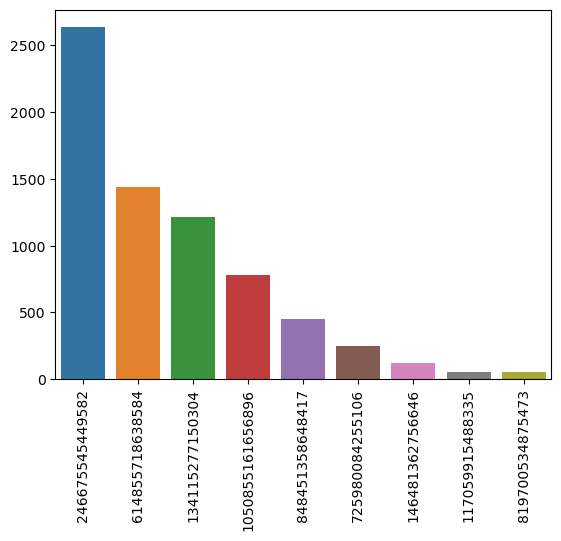

In [16]:
value_counts = df_thailand['profile_id'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xticks(rotation=90)
plt.show()

Con el fin de obtener una visión más detallada de la columna 'profile_id', se llevó a cabo un proceso de desglose de la información contenida en dicha columna. A continuación, se realizó una representación gráfica con el objetivo de lograr una visualización clara y destacar las diferencias entre cada uno de los perfiles presentes en los datos. Esta visualización permite apreciar y comparar las características distintivas de los perfiles de manera más evidente.

In [17]:
df_type = pd.DataFrame(df_thailand.groupby('status_type')[['profile_id', 'publication_id']].count().reset_index())
df_type

,status_type,profile_id,publication_id
0,link,63,63
1,photo,4244,4244
2,status,359,359
3,video,2333,2333


<Axes: xlabel='status_type', ylabel='publication_id'>

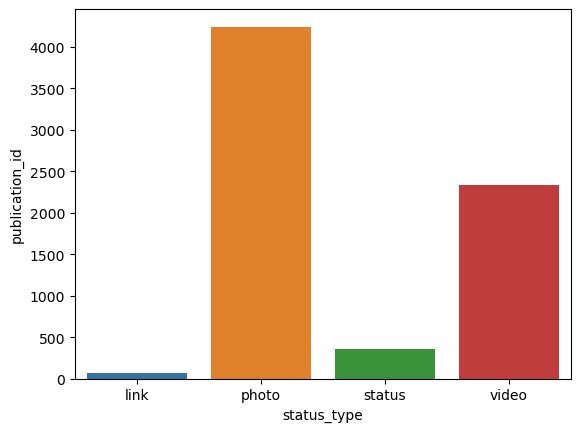

In [18]:
sns.barplot(data=df_type, x='status_type', y='publication_id')

En última instancia, se llevó a cabo la agrupación de las cuatro categorías de la columna 'status_id' con el objetivo de determinar el número de publicaciones en relación con la columna 'publication_id'. Para una mejor visualización y comprensión de estos datos, se generó una tabla y se creó una gráfica correspondiente.

Al combinar la tabla y la gráfica, se logra una representación más completa y comprensible de la relación entre las categorías de 'status_id' y los valores de 'publication_id', brindando una visión más clara y visualmente apreciable de estos datos.

**Numéricas**

In [19]:
pd.options.display.float_format = '{:.2f}'.format
df_thailand.describe().T

,count,mean,std,min,25%,50%,75%,max
status_published,6999.00,1479291503.15,59901554.76,1342320660.00,1457406300.00,1510880640.00,1520320950.00,1528852320.00
num_reactions,6999.00,224.99,452.88,0.00,17.00,58.00,216.00,4710.00
num_comments,6999.00,225.55,892.74,0.00,0.00,4.00,22.00,20990.00
num_shares,6999.00,40.26,132.05,0.00,0.00,0.00,4.00,3424.00
num_likes,6999.00,209.95,439.55,0.00,17.00,57.00,182.00,4710.00
num_loves,6999.00,12.75,40.11,0.00,0.00,0.00,3.00,657.00
num_wows,6999.00,1.25,8.73,0.00,0.00,0.00,0.00,278.00
num_hahas,6999.00,0.70,3.97,0.00,0.00,0.00,0.00,157.00
num_sads,6999.00,0.23,1.48,0.00,0.00,0.00,0.00,51.00
num_angrys,6999.00,0.11,0.69,0.00,0.00,0.00,0.00,31.00


La tabla presenta estadísticas descriptivas para varias variables del dataset. A continuación se proporciona una interpretación para cada una de las columnas:

- Para la columna 'status_published':
  - El conteo (count) muestra que hay 6999 registros en total.
  - La media (mean) indica que el valor promedio de las marcas de tiempo de publicación es aproximadamente 1479291503.15.
  - La desviación estándar (std) muestra la dispersión de los datos alrededor de la media, siendo 59901554.76.
  - El valor mínimo (min) representa la marca de tiempo más antigua, que es 1342320660.00.
  - Los percentiles 25%, 50% y 75% indican respectivamente los valores que separan el 25% inferior, la mediana y el 25% superior de los datos.
  - El valor máximo (max) corresponde a la marca de tiempo más reciente, que es 1528852320.00.

- Para las demás columnas (num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys):
  - El conteo (count) muestra que hay 6999 registros en cada columna.
  - La media (mean) indica el valor promedio para cada una de las variables.
  - La desviación estándar (std) muestra la dispersión de los datos alrededor de la media.
  - El valor mínimo (min) representa el valor más bajo observado para cada variable.
  - Los percentiles 25%, 50% y 75% indican respectivamente los valores que separan el 25% inferior, la mediana y el 25% superior de los datos.
  - El valor máximo (max) corresponde al valor más alto observado para cada variable.

En resumen, la tabla proporciona información estadística sobre las variables del dataset, incluyendo el número de observaciones, la media, la desviación estándar, los valores mínimo y máximo, así como los percentiles que ayudan a comprender la distribución de los datos.

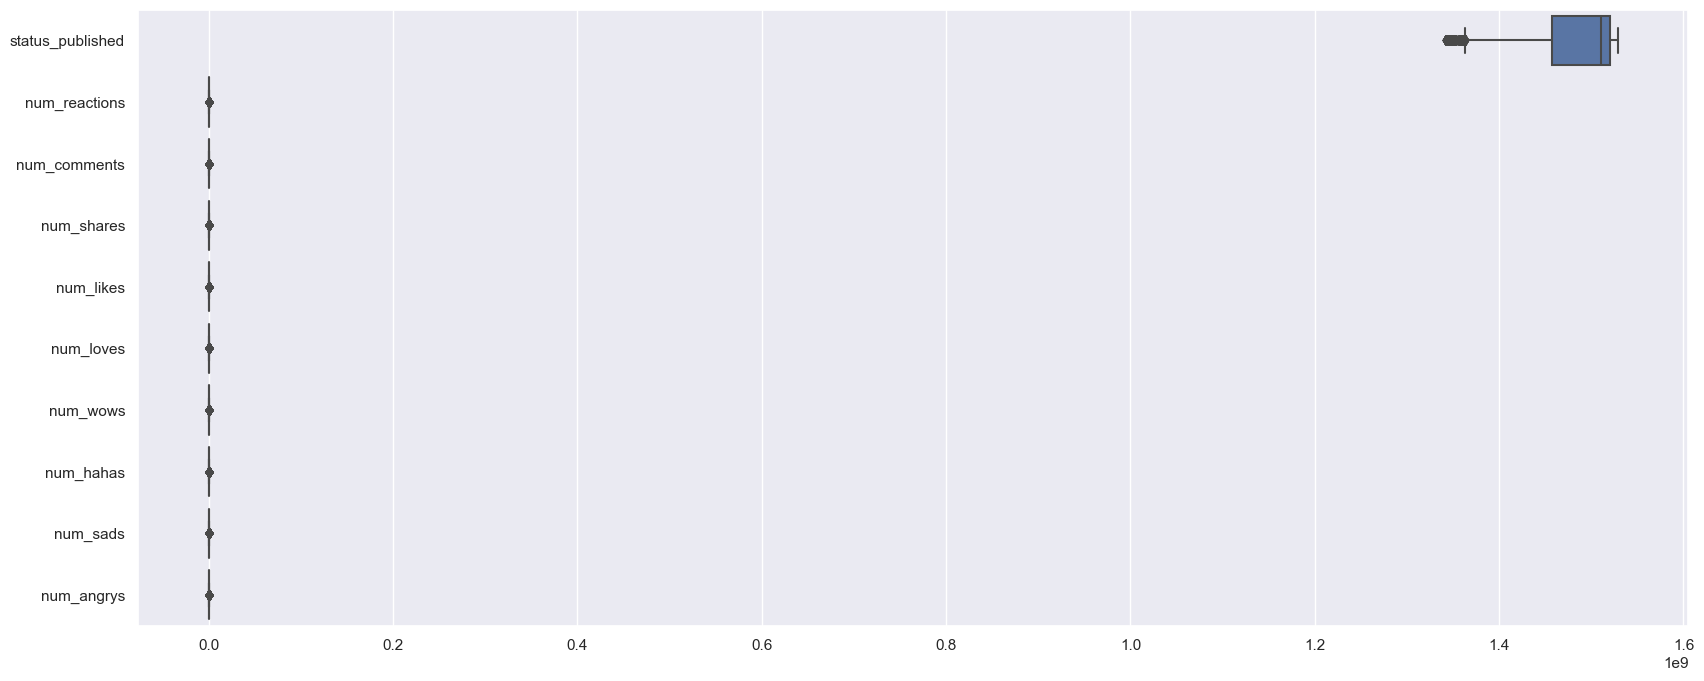

In [20]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df_thailand,orient='h')

Para visualizar la información estadística de manera más efectiva, generamos un gráfico de boxplot. Sin embargo, nos enfrentamos a un desafío al tratar de visualizar adecuadamente los valores de la variable 'status_published' en comparación con las otras variables que tienen valores cercanos a cero.

Es importante recordar que la variante 'status_published' representa una marca de tiempo que indica una fecha y hora específica. Al analizar el boxplot, también observamos la presencia de valores atípicos y una mediana que se encuentra en el primer percentil.

Debido a que los valores de 'status_published' son significativamente mayores en comparación con las otras variables, la escala de la gráfica se ve afectada y dificulta la visualización adecuada de los datos. 

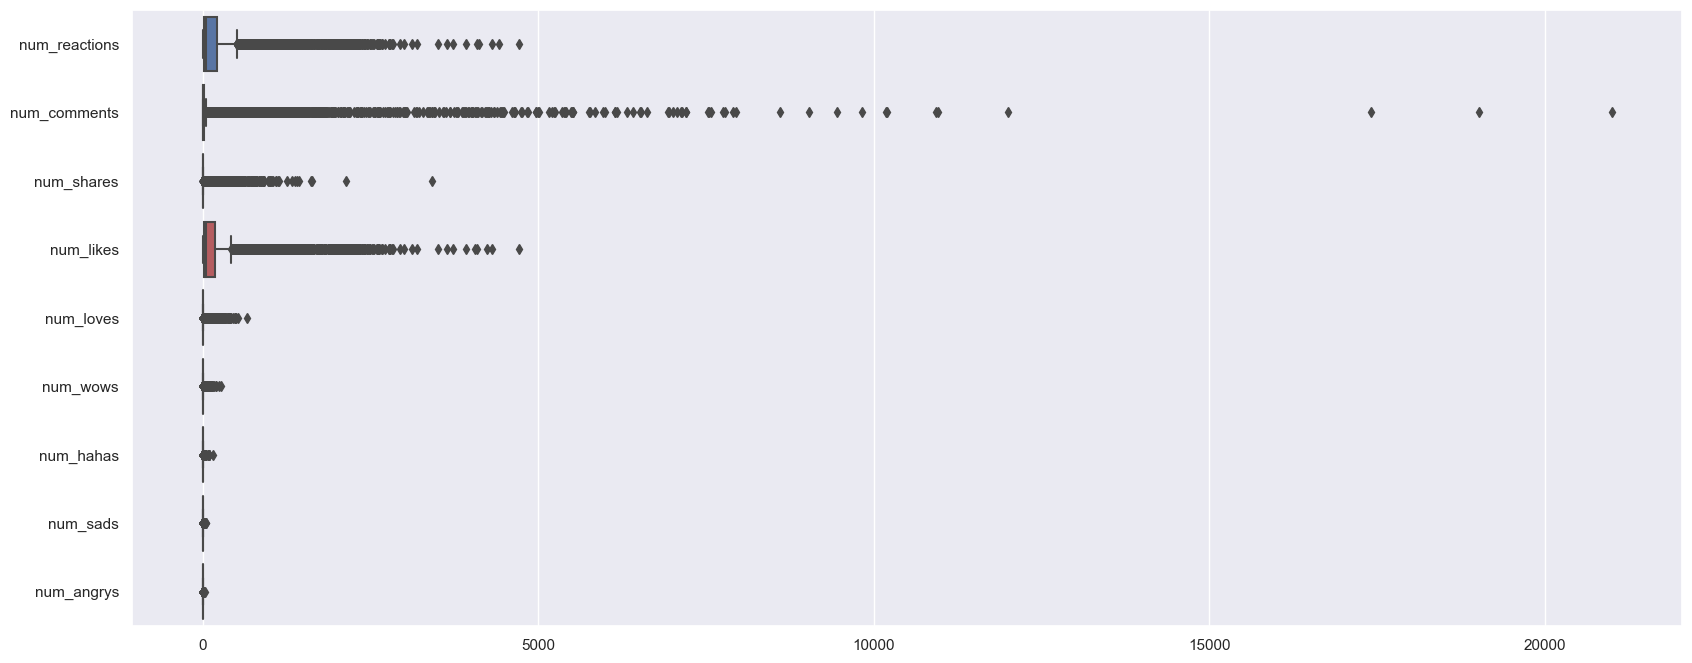

In [21]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df_thailand.drop('status_published', axis=1),orient='h')

En esta gráfica de boxplot, se realizó una modificación al quitar la variable 'status_published' con el fin de mejorar la visualización de las demás variables.

Al observar la gráfica, llama la atención de inmediato que todas las variables presentan valores atípicos (outliers). Es interesante destacar que las variables 'num_reactions' y 'num_likes' tienen valores mucho más altos en comparación con las otras variables. Por otro lado, las demás variables tienden a tener principalmente valores cero junto con algunos outliers.

Esta distribución de los datos es comprensible debido a la naturaleza de las variables, ya que representan comentarios y reacciones a publicaciones en Facebook. Es común que algunas publicaciones generen una gran cantidad de interacciones y comentarios, lo cual se refleja en los valores más altos de 'num_reactions' y 'num_likes'. Por otro lado, es normal que la mayoría de las publicaciones tengan un número bajo o incluso nulo de comentarios y reacciones, lo que se traduce en la predominancia de ceros y la presencia de outliers ocasionales.

<Axes: >

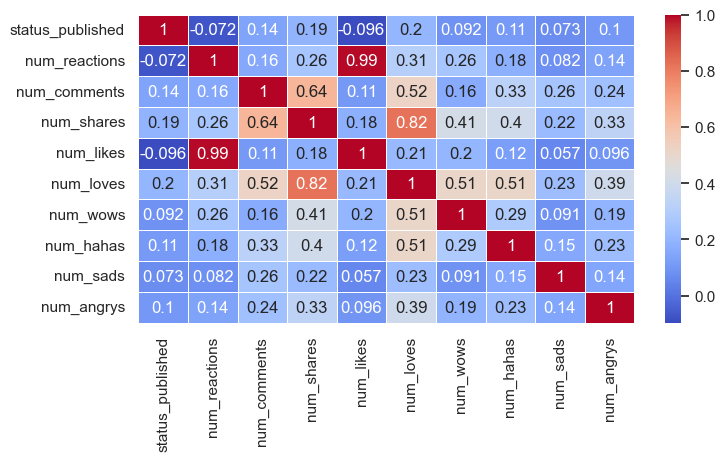

In [22]:
sns.set_theme()

f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_thailand.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

El mapa de calor proporciona información sobre la correlación entre las variables.

Al analizar el mapa de calor, se observa una correlación muy alta (0.99) entre las variables 'num_reactions' y 'num_likes'. Esto indica una fuerte relación entre la cantidad total de reacciones y la cantidad de "me gusta" que ha recibido una publicación.

Además, se encuentra una correlación media alta de 0.64 entre las variables 'num_comments' y 'num_shares'. Esto sugiere que el número de comentarios realizados en una publicación está relacionado de manera significativa con la cantidad de veces que se ha compartido.

La variable 'num_comments' también muestra una correlación media (0.52) con la variable 'num_loves'. Esto implica que el número de comentarios está moderadamente relacionado con la cantidad de veces que se ha marcado como "me encanta" una publicación.

Asimismo, se destaca una correlación alta de 0.82 entre las variables 'num_shares' y 'num_loves'. Esto sugiere que la cantidad de veces que una publicación se ha compartido está fuertemente relacionada con la cantidad de veces que se ha marcado como "me encanta".

Por último, la variable 'num_loves' presenta una correlación media (0.51) tanto con 'num_wows' como con 'num_hahas'. Esto indica que la cantidad de veces que una publicación ha recibido la reacción "me encanta" está moderadamente relacionada con la cantidad de veces que ha recibido las reacciones "me divierte" y "me asombra".

En resumen, el mapa de calor nos proporciona una visión clara de las correlaciones existentes entre las variables, destacando las fuertes relaciones entre 'num_reactions' y 'num_likes', así como entre 'num_shares' y 'num_loves'. Estas correlaciones nos brindan información valiosa sobre cómo diferentes tipos de interacciones en las publicaciones de Facebook están relacionadas entre sí.

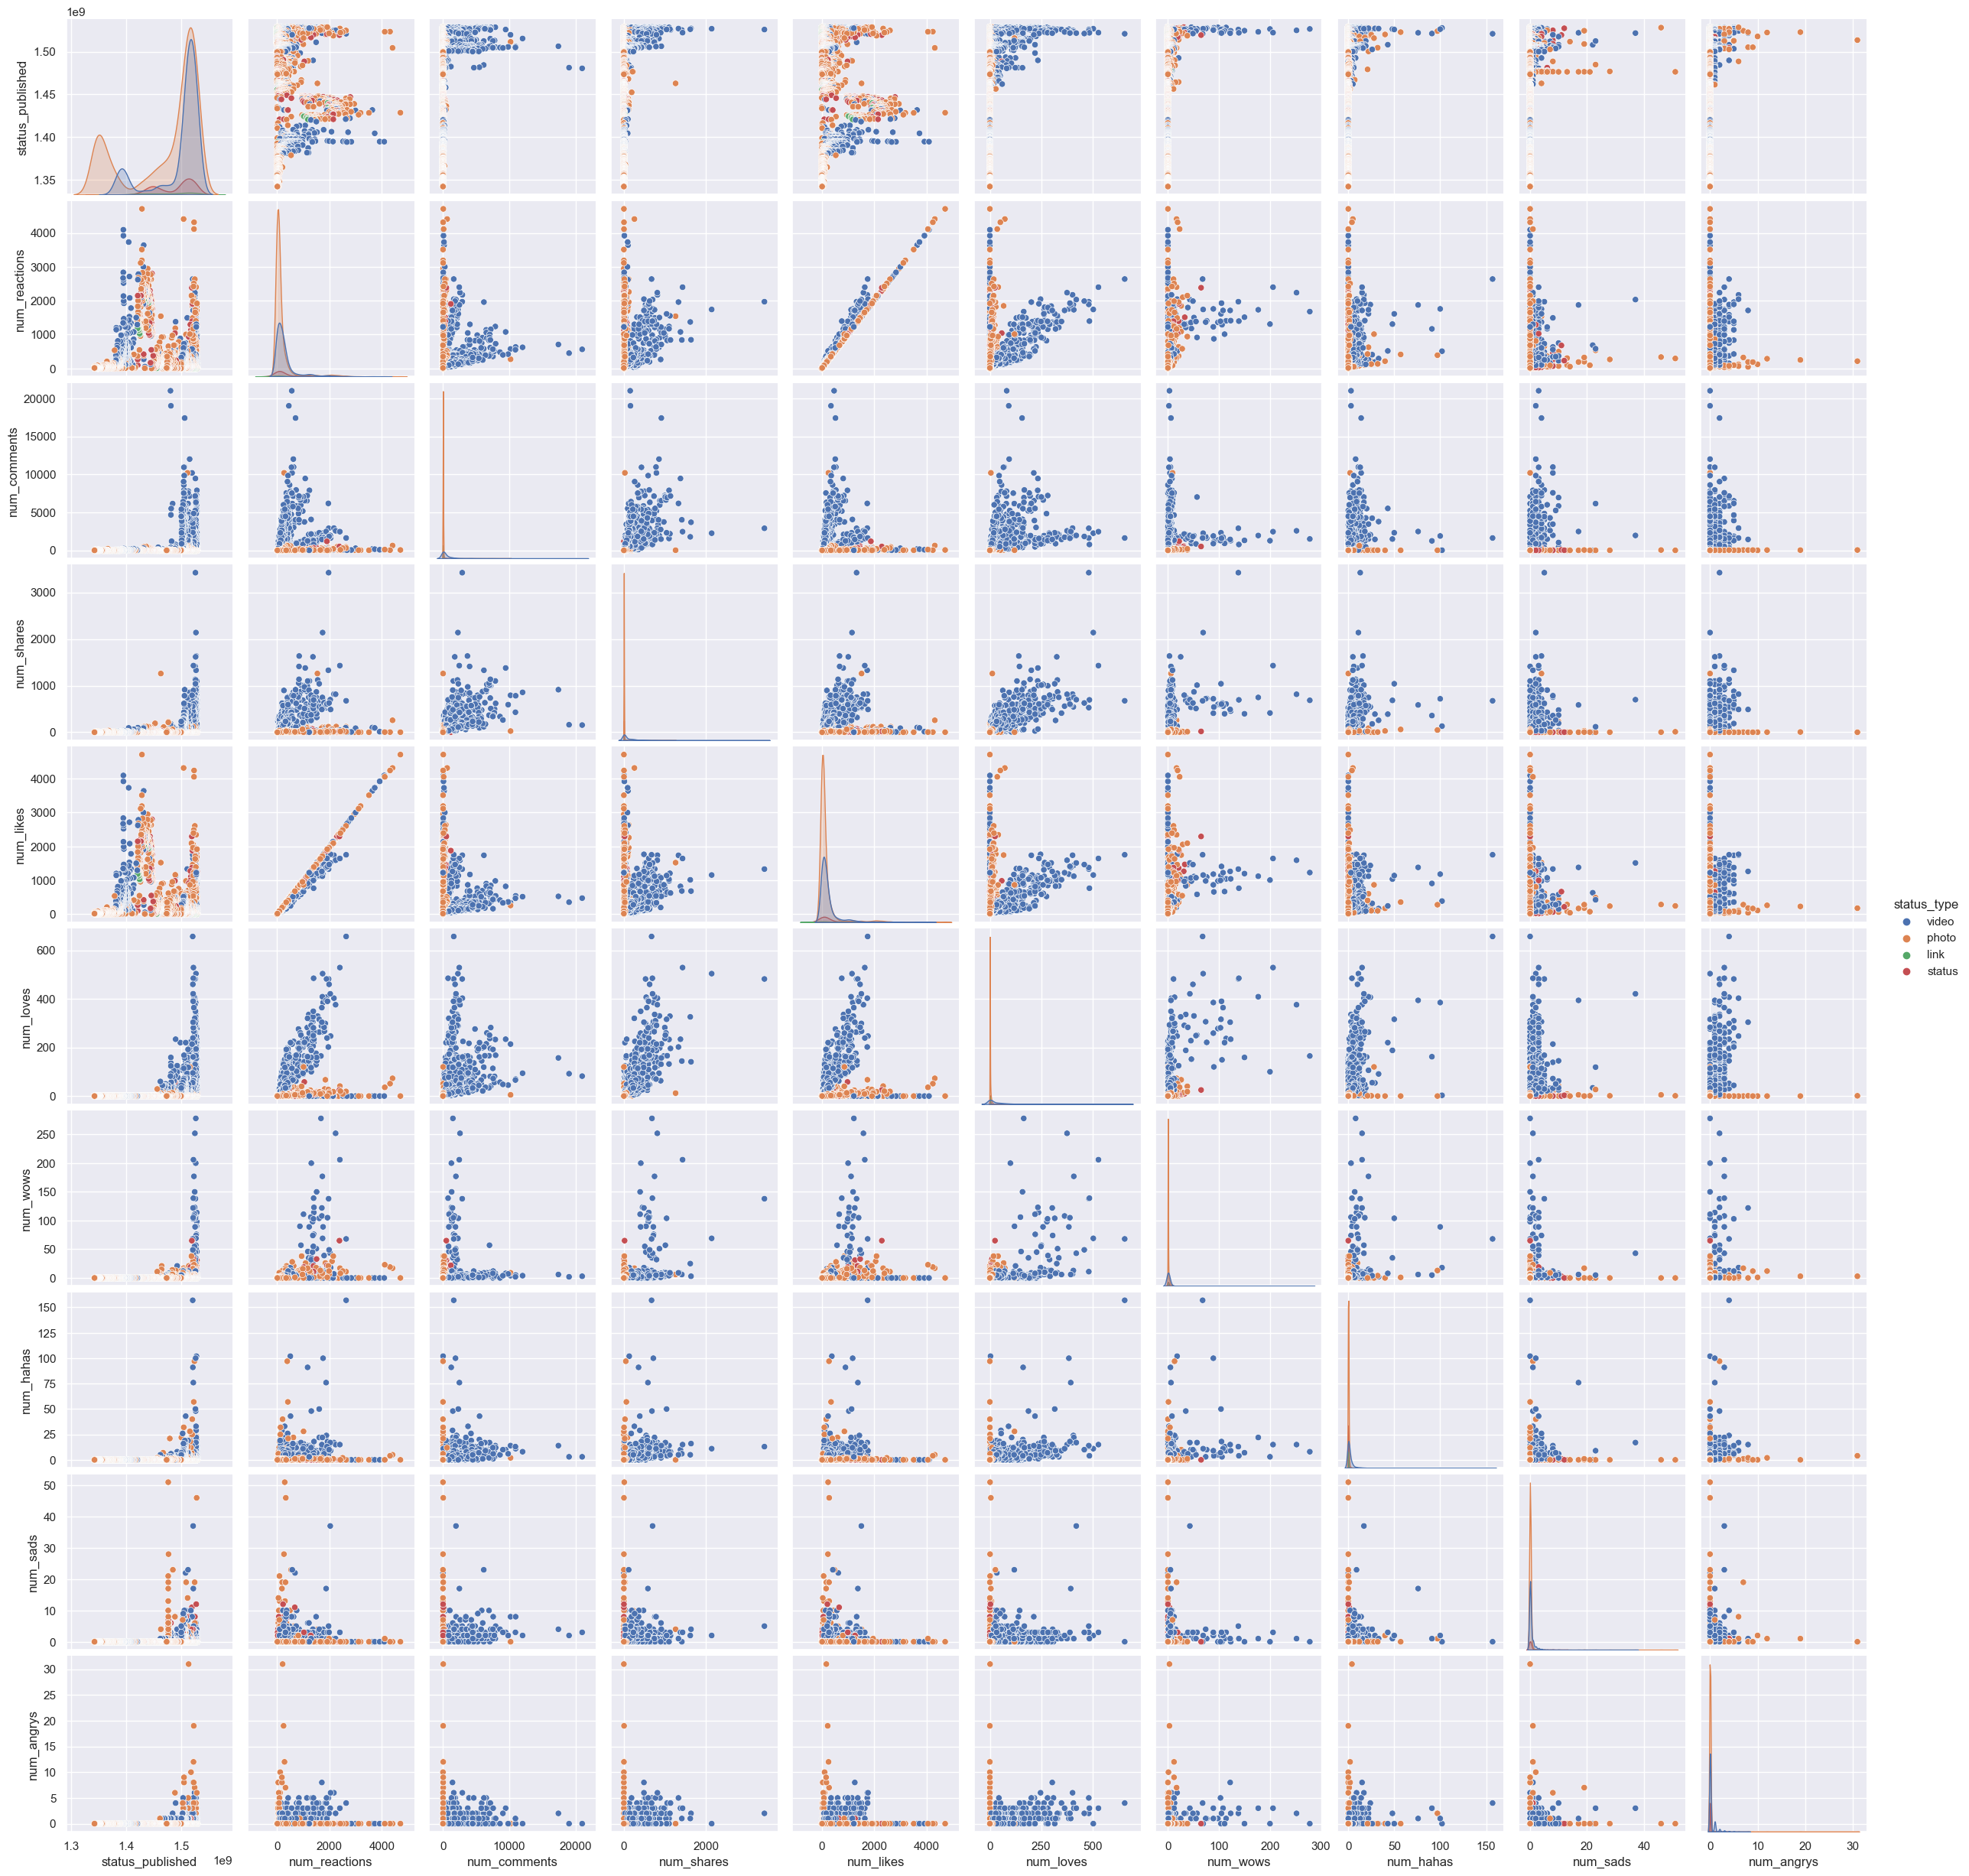

In [23]:
sns.pairplot(df_thailand, hue='status_type')

Este pairplot muestra gráficos de dispersión y distribuciones para cada par de variables en el conjunto de datos, diferenciados por el atributo 'status_type'. Esto nos permite visualizar las relaciones entre las variables y cómo se distribuyen según el tipo de estado.

Observaciones e interpretaciones que se pueden extraer del pairplot son:

Las variables 'num_reactions' y 'num_likes' muestran una fuerte correlación positiva, lo cual es esperado ya que 'num_likes' representa el número de "me gusta" y 'num_reactions' representa el número total de reacciones. Esto indica que cuando hay más reacciones en general, también hay más "me gusta".

La variable 'num_comments' parece tener una correlación moderada con 'num_shares', lo cual podría indicar que los posts con más comentarios también tienden a ser compartidos con mayor frecuencia.

Las variables 'num_loves' y 'num_shares' también presentan una correlación positiva, lo cual sugiere que los posts que generan más "me encanta" también tienden a ser compartidos en mayor medida.

En general, se puede observar que las variables 'num_reactions', 'num_likes' y 'num_loves' tienen valores más altos en comparación con las otras variables, lo cual indica que estos atributos son más prominentes en el conjunto de datos.

## Preprocesamiento

El primer paso en el preprocesamiento de datos consiste en convertir las variables numéricas a tipo float.

In [24]:
df_thailand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile_id        6999 non-null   object 
 1   publication_id    6999 non-null   object 
 2   status_type       6999 non-null   object 
 3   status_published  6999 non-null   float64
 4   num_reactions     6999 non-null   int64  
 5   num_comments      6999 non-null   int64  
 6   num_shares        6999 non-null   int64  
 7   num_likes         6999 non-null   int64  
 8   num_loves         6999 non-null   int64  
 9   num_wows          6999 non-null   int64  
 10  num_hahas         6999 non-null   int64  
 11  num_sads          6999 non-null   int64  
 12  num_angrys        6999 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 765.5+ KB


In [25]:
df_thailand[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys']] = df_thailand[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].astype(float)

In [26]:
df_thailand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile_id        6999 non-null   object 
 1   publication_id    6999 non-null   object 
 2   status_type       6999 non-null   object 
 3   status_published  6999 non-null   float64
 4   num_reactions     6999 non-null   float64
 5   num_comments      6999 non-null   float64
 6   num_shares        6999 non-null   float64
 7   num_likes         6999 non-null   float64
 8   num_loves         6999 non-null   float64
 9   num_wows          6999 non-null   float64
 10  num_hahas         6999 non-null   float64
 11  num_sads          6999 non-null   float64
 12  num_angrys        6999 non-null   float64
dtypes: float64(10), object(3)
memory usage: 765.5+ KB


Una vez realizado el cambio, aplicamos el test de Shapiro para verificar si las variables siguen una distribución gaussiana o no.

In [27]:
from scipy.stats import shapiro

resultados = [shapiro(df_thailand[col])[1] > 0.05 for col in df_thailand.select_dtypes(include=['float64']).columns]
print(resultados)

[False, False, False, False, False, False, False, False, False, False]


C:\Users\arace\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Inicialmente, las variables no siguen una distribución gaussiana. Sin embargo, dado que el conjunto de datos contiene casi 7 mil observaciones, no nos arriesgamos a confiar únicamente en el test de Shapiro. En su lugar, utilizamos el test kstest para evaluar la distribución de las variables.

In [28]:
from scipy.stats import kstest

resultados = [kstest(df_thailand[col], 'norm')[1] > 0.05 for col in df_thailand.select_dtypes(include=['float64']).columns]
print(resultados)


[False, False, False, False, False, False, False, False, False, False]


Ambos tests, el test de Shapiro y el test de Kolmogorov-Smirnov, confirman que las variantes numéricas del dataset no siguen una distribución gaussiana.

**Columnas Binarias**

A continuación, aplicamos la función `get_dummies` a las variables 'status_type' y 'profile_id'. Esto nos permite convertir estas variables categóricas en variables dummy, asignando valores binarios a cada una de sus categorías.

In [29]:
df_thailand = pd.get_dummies(df_thailand, prefix= 'type', columns = ["status_type"])
df_thailand = pd.get_dummies(df_thailand, prefix= 'id', columns = ['profile_id'])
df_thailand

,publication_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,...,type_video,id_1050855161656896,id_117059915488335,id_134115277150304,id_146481362756646,id_246675545449582,id_614855718638584,id_725980084255106,id_819700534875473,id_848451358648417
0,1649696485147474,1524376800.00,529.00,512.00,262.00,432.00,92.00,3.00,1.00,1.00,...,1,0,0,0,0,1,0,0,0,0
1,1649426988507757,1524350700.00,150.00,0.00,0.00,150.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0
2,1648730588577397,1524291420.00,227.00,236.00,57.00,204.00,21.00,1.00,1.00,0.00,...,1,0,0,0,0,1,0,0,0,0
3,1648576705259452,1524277740.00,111.00,0.00,0.00,111.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0
4,1645700502213739,1524021720.00,213.00,0.00,0.00,204.00,9.00,0.00,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1061863470556065,1474685880.00,89.00,0.00,0.00,89.00,0.00,0.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,0
7046,1061334757275603,1474629540.00,16.00,0.00,0.00,14.00,1.00,0.00,1.00,0.00,...,0,1,0,0,0,0,0,0,0,0
7047,1060126464063099,1474498980.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,0
7048,1058663487542730,1474332180.00,351.00,12.00,22.00,349.00,2.00,0.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,0


In [30]:
df_thailand = df_thailand.drop('publication_id', axis=1)

In [31]:
pd.set_option('display.max_columns', None)
df_thailand

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,id_1050855161656896,id_117059915488335,id_134115277150304,id_146481362756646,id_246675545449582,id_614855718638584,id_725980084255106,id_819700534875473,id_848451358648417
0,1524376800.00,529.00,512.00,262.00,432.00,92.00,3.00,1.00,1.00,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1524350700.00,150.00,0.00,0.00,150.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1524291420.00,227.00,236.00,57.00,204.00,21.00,1.00,1.00,0.00,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1524277740.00,111.00,0.00,0.00,111.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1524021720.00,213.00,0.00,0.00,204.00,9.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1474685880.00,89.00,0.00,0.00,89.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0
7046,1474629540.00,16.00,0.00,0.00,14.00,1.00,0.00,1.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0
7047,1474498980.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0
7048,1474332180.00,351.00,12.00,22.00,349.00,2.00,0.00,0.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0


Finalmente, eliminamos la variable 'publication_id' del dataset. Durante pruebas independientes realizadas, nos dimos cuenta de que esta columna no es necesaria, ya que introduce ruido en los datos y no aporta información relevante. Por lo tanto, decidimos eliminarla del conjunto de datos.

**Robust Scaler**

Aplicamos Robust Scaler a las columnas numéricas con el fin de prepararlas para el PCA (Análisis de Componentes Principales). El Robust Scaler es una técnica de escalado robusta que es menos sensible a los valores atípicos y se utiliza para asegurar que las variables numéricas tengan una escala comparable antes de realizar el PCA.

In [32]:
from sklearn.preprocessing import RobustScaler

columns_con_outliers = ['status_published','num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 
                        'num_hahas', 'num_sads', 'num_angrys']

scaling = RobustScaler()
df_thailand[columns_con_outliers] = scaling.fit_transform(df_thailand[columns_con_outliers])

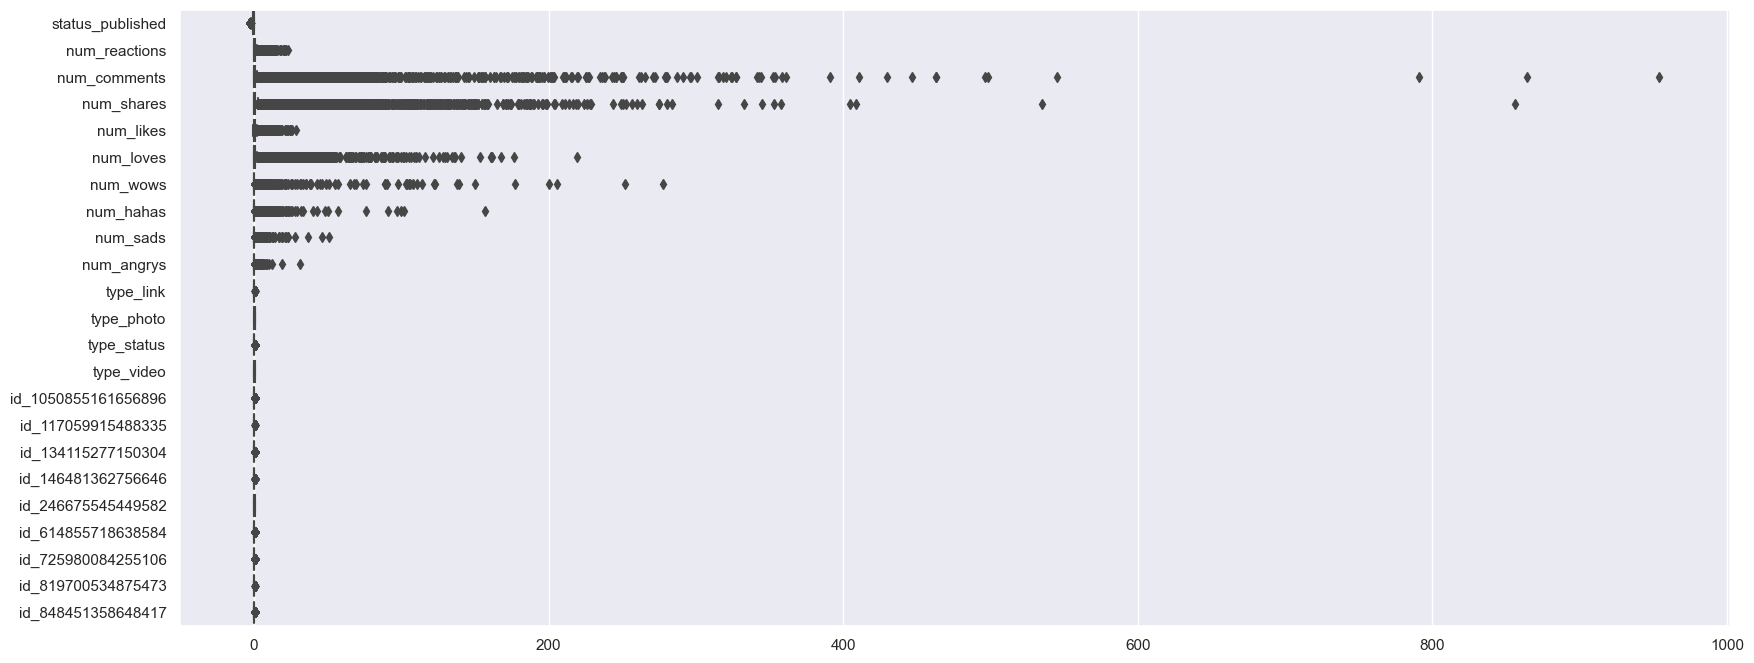

In [33]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df_thailand, orient='h')

La gráfica de boxplot proporciona una representación visual clara de cómo quedaron todas las variables después de la conversión a variables binarias y la normalización. Esta representación nos permite analizar la distribución, la presencia de valores atípicos y la dispersión de los datos en cada variable.

**PCA**

Una vez que los datos están preparados, se aplica el Análisis de Componentes Principales (PCA) al conjunto de datos.

Primero, se importa la biblioteca necesaria para utilizar el PCA. A continuación, se entrena el modelo PCA utilizando los datos preparados y se determina el número de componentes a los que se reducirán las dimensiones. Esto se hace para capturar la mayor cantidad de variabilidad en los datos con la menor cantidad de componentes posibles.

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(.95)
df_pca = pca.fit(df_thailand)
pca.n_components_

2

In [52]:
pca.explained_variance_ratio_

array([0.78380467, 0.1699095 ])

Después de aplicar el PCA al conjunto de datos, se reduce a 2 dimensiones.. El objetivo de esta reducción es representar los datos en un espacio bidimensional que capture la mayor cantidad de información posible.

Además de la reducción de dimensiones, se obtiene el ratio de varianza, que indica cuánta varianza se conserva al reducir las dimensiones a 2. Este valor es importante para evaluar qué tan bien se preserva la información original en el espacio de menor dimensión.

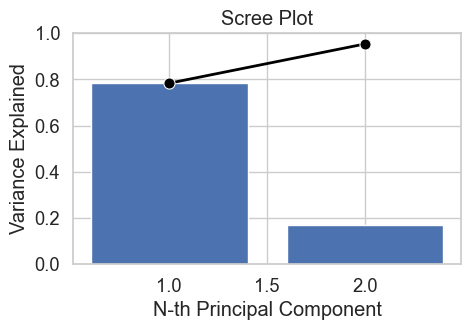

In [53]:
PC_components = range(1, len(pca.explained_variance_ratio_) + 1)  # Rango de componentes principales

# Scree Plot
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(5, 3))
_ = plt.bar(PC_components, pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


La gráfica Scree Plot representa la varianza explicada por cada componente principal en un PCA. En el eje x, se muestra el número de componentes principales (PC) y en el eje y se representa la varianza explicada. 

La altura de cada barra indica la cantidad de varianza explicada por cada componente principal individualmente. A medida que se avanza en el eje x, la varianza explicada disminuye, lo que indica que los componentes principales posteriores capturan menos información. En el caso de nuestra tabla, podemos observar que el primer componente principal explica aproximadamente el 80% de la varianza, mientras que el segundo componente principal explica cerca del 20% de la varianza.

La línea trazada muestra la varianza acumulada a medida que se agregan más componentes principales. Cuanto más empinada es la curva al principio, más información se captura con los primeros componentes principales. A medida que se agregan más componentes, la curva se vuelve menos pronunciada, lo que indica que los componentes posteriores contribuyen con menos varianza explicada. Dado que en nuestra tabla solo tenemos dos componentes principales, podemos ver claramente cómo asciende la curva, lo que indica que estos dos componentes capturan la mayor parte de la varianza en los datos.

<Axes: >

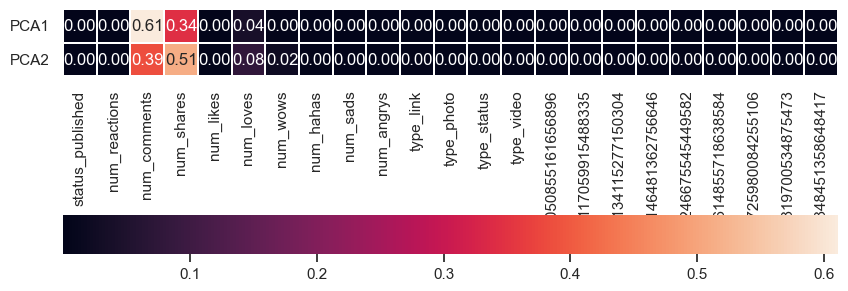

In [54]:
sns.set_theme()

f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(pca.components_**2,
            yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
            xticklabels=list(df_thailand),
            annot=True,
            fmt='.2f',
            square=True,
            linewidths=0.05,
            cbar_kws={"orientation": "horizontal"})

El heatmap muestra de manera clara las dos variables que se han seleccionado como componentes después de la reducción de dimensiones mediante PCA. En este caso, las variables seleccionadas son "num_comments" y "num_shares", las cuales previamente habíamos identificado como teniendo una fuerte correlación. 

Podemos observar que el componente PCA1 tiene una carga de 0.61 en "num_comments" y 0.34 en "num_shares". Esto significa que el primer componente principal está principalmente influenciado por la variable "num_comments" y en menor medida por "num_shares". 

Por otro lado, el componente PCA2 tiene una carga de 0.39 en "num_comments" y 0.51 en "num_shares". Esto indica que el segundo componente principal está más equilibrado en su influencia entre ambas variables, aunque sigue siendo ligeramente más influenciado por "num_shares". 

En resumen, el heatmap muestra claramente cómo se distribuyen las variables seleccionadas en los dos componentes principales después de la reducción de dimensiones, y nos permite identificar las contribuciones relativas de cada variable en cada componente.

In [55]:
pca = PCA(n_components=2)
pca.fit(df_thailand)

df_thai_pca = pd.DataFrame(pca.transform(df_thailand), columns=["PC1", "PC2"])
df_thai_pca.head(10)

,PC1,PC2
0,48.15,39.28
1,-14.87,-2.24
2,3.38,3.44
3,-14.88,-2.25
4,-14.27,-1.39
5,-14.27,-1.78
6,22.84,1.44
7,11.24,-2.36
8,-14.50,-1.80
9,-14.21,-2.03


Aplicamos nuevamente el análisis de componentes principales (PCA) al dataset, pero esta vez especificamos que queremos reducir las dimensiones a solo 2 componentes, ya que sabemos que esa es la cantidad de componentes en nuestros datos. Luego, creamos un nuevo dataframe para visualizar los resultados de manera más atractiva y legible.

Esta visualización nos permite entender cómo se distribuyen las observaciones en el espacio de los componentes principales y cómo se relacionan entre sí de una manera más agradable a la vista.

<Axes: xlabel='PC1', ylabel='PC2'>

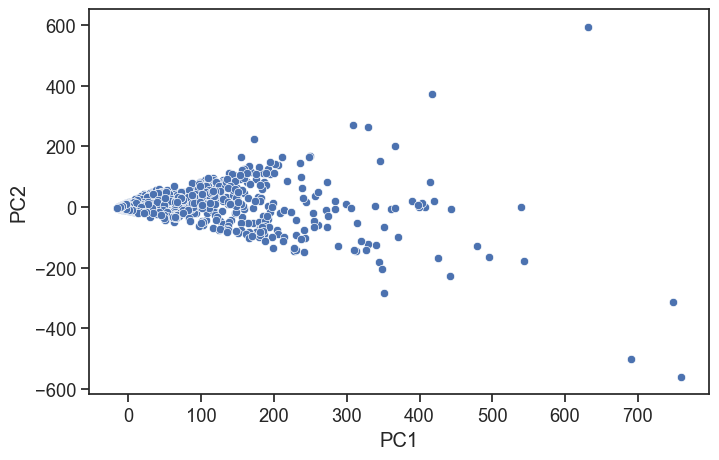

In [56]:
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_thai_pca, x='PC1', y='PC2')

Además, creamos un scatterplot que nos permite visualizar de manera más clara la distribución de los datos en función de los dos componentes principales. En el scatterplot, el eje x representa el componente PCA1 y el eje y representa el componente PCA2.

Cada punto en el scatterplot corresponde a una observación en nuestro dataset. La posición de cada punto en el gráfico nos muestra cómo se distribuyen las observaciones en relación con los dos componentes principales. Podemos identificar patrones, agrupamientos o dispersión de los datos a través de la dispersión de los puntos en el gráfico.

Esta visualización nos ayuda a comprender mejor las relaciones y estructuras subyacentes en nuestros datos después de la reducción de dimensiones con PCA. Nos permite identificar posibles agrupamientos, tendencias o patrones emergentes que no eran evidentes en el dataset original.

**K-Means**

Una vez que hemos realizado la limpieza y preprocesamiento de los datos, estamos listos para entrenar el modelo K-means utilizando el dataset transformado mediante PCA.

El modelo K-means es un algoritmo de agrupamiento que asigna cada observación a uno de los k grupos definidos previamente, donde k es un valor especificado por el usuario. En nuestro caso, utilizaremos el dataset transformado por PCA como entrada para el modelo K-means.

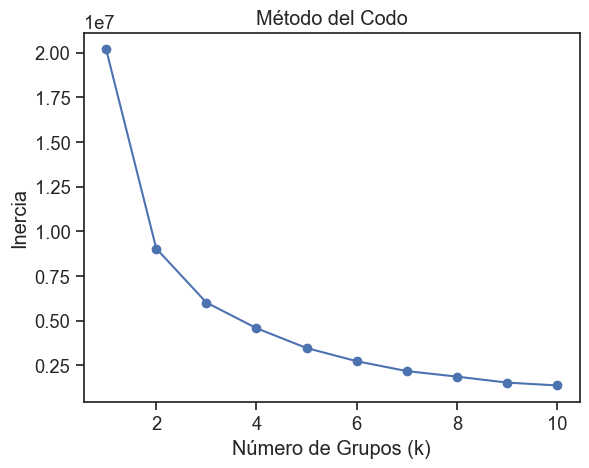

In [57]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_thai_pca)  
    inertias.append(kmeans.inertia_)
    
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Número de Grupos (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

En la gráfica del método del codo, trazamos la suma de las distancias al cuadrado en el eje y y el número de grupos k en el eje x. Observamos cómo disminuye la suma de las distancias a medida que aumentamos el número de grupos. Sin embargo, en algún punto, el descenso en la suma de las distancias comienza a aplanarse, formando una especie de "codo".

En nuestro caso, al analizar la gráfica del método del codo, observamos que el codo se encuentra en k=3, lo que sugiere que 3 grupos podrían ser un número adecuado para nuestro modelo K-means. Sin embargo, es importante tener en cuenta otros factores y criterios específicos del problema para tomar la decisión final sobre el número de grupos.

In [58]:
from kneed import KneeLocator
knee = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')

print("Número óptimo de clusters:", knee.elbow)

Número óptimo de clusters: 3


Para confirmar el número óptimo de clusters obtenido mediante el método del codo, utilizamos la biblioteca KneeLocator. 

En nuestro caso, confirmamos que el número óptimo de clusters es 3, lo cual coincide con lo obtenido anteriormente utilizando el método del codo. Esto refuerza la elección de 3 clusters como el número adecuado para nuestro modelo K-means.

In [59]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(df_thai_pca)

KMeans(n_clusters=3, random_state=42)

In [60]:
y_predicted = km.predict(df_thai_pca)
y_predicted

array([1, 0, 0, ..., 0, 0, 0])

In [61]:
centroids = km.cluster_centers_
centroids

array([[-11.09682896,  -1.20192395],
       [100.18127733,  25.01756542],
       [335.02655358, -56.9765383 ]])

Una vez que hemos determinado el número óptimo de clusters, lo utilizamos como parámetro para entrenar nuestro modelo K-means. Esto implica asignar cada observación a uno de los clusters basándose en su similitud con los centroides. Después de entrenar el modelo, podemos utilizarlo para hacer predicciones en nuevos conjuntos de datos.

Además, al entrenar el modelo K-means, también obtenemos los centroides correspondientes a cada cluster. 

In [62]:
df_thailand['cluster_km'] = y_predicted
df_thailand

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,id_1050855161656896,id_117059915488335,id_134115277150304,id_146481362756646,id_246675545449582,id_614855718638584,id_725980084255106,id_819700534875473,id_848451358648417,cluster_km
0,0.21,2.37,23.09,65.50,2.27,30.67,3.00,1.00,1.00,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0.21,0.46,-0.18,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.21,0.85,10.55,14.25,0.89,7.00,1.00,1.00,0.00,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.21,0.27,-0.18,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0.21,0.78,-0.18,0.00,0.89,3.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.58,0.16,-0.18,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0
7046,-0.58,-0.21,-0.18,0.00,-0.26,0.33,0.00,1.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0
7047,-0.58,-0.28,-0.18,0.00,-0.34,0.33,0.00,0.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0
7048,-0.58,1.47,0.36,5.50,1.77,0.67,0.00,0.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0


Luego, agregamos una columna al dataset original que contiene las predicciones generadas por el modelo K-means. Esta columna será útil más adelante para realizar comprobaciones adicionales.

In [63]:
df_thailand['cluster_km'].value_counts()

0    6452
1     475
2      72
Name: cluster_km, dtype: int64

A continuación, verificamos los valores de la columna de predicciones correspondientes a cada cluster en el dataset y representamos los datos en un gráfico de dispersión, donde cada punto está asignado a su respectivo cluster.

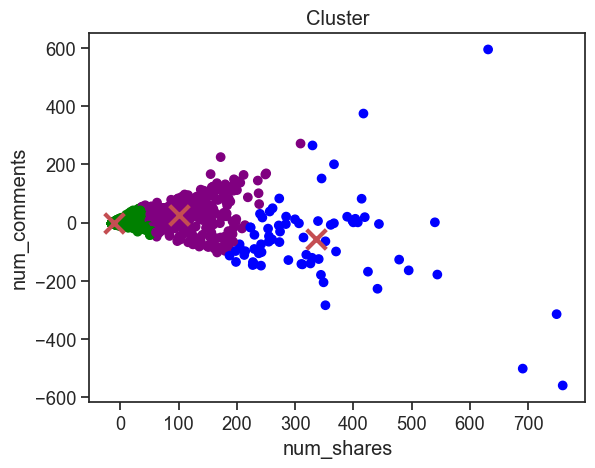

In [64]:
from matplotlib.colors import ListedColormap
cmap_colors = ListedColormap(['green', 'purple', 'blue'])
plt.scatter(df_thai_pca.iloc[:, 0], df_thai_pca.iloc[:, 1], c=y_predicted, cmap=cmap_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('num_shares')
plt.ylabel('num_comments')
plt.title('Cluster')
plt.show()

La gráfica de dispersión muestra el patrón obtenido después de aplicar el PCA y dividir los datos en los 3 clusters utilizando el modelo de KMeans. Cada punto se asigna a su respectivo cluster, y los centroides de cada cluster se marcan en el centro de los grupos correspondientes. Esta visualización nos permite observar cómo los datos se agrupan y cómo se distribuyen en relación con los centroides de cada cluster.

## Ejercicio 2

Clasifica los diferentes registros utilizando el algoritmo de clustering jerárquico.

In [65]:
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


Antes de aplicar el algoritmo de clustering jerárquico, se genera un dendrograma para visualizar la estructura de agrupamiento de los datos. Un dendrograma es un diagrama de árbol que muestra la jerarquía de los clusters formados en base a la similitud o distancia entre las observaciones.

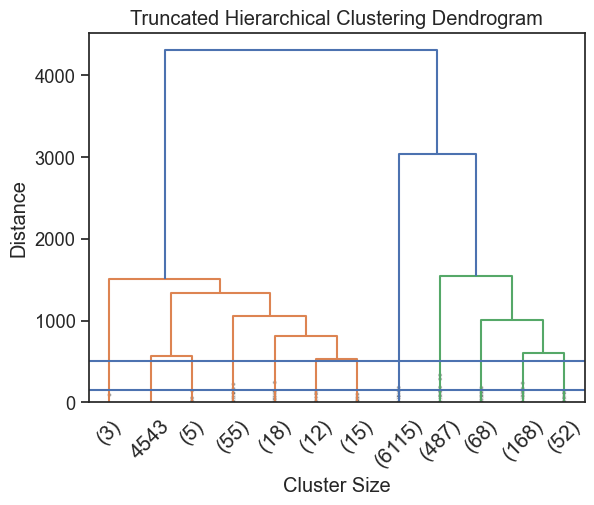

In [66]:
Z = linkage(df_thai_pca, 'ward')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

Al observar el dendrograma, podemos notar diferentes aspectos:

Alturas y fusiones de clusters: Las fusiones de clusters se muestran como uniones de ramas en el dendrograma. La altura de cada fusión indica la distancia o disimilitud entre los clusters fusionados. Las fusiones que ocurren a una mayor altura indican una mayor disimilitud entre los clusters.

Distancia horizontal: Las distancias horizontales entre las fusiones de clusters indican la distancia o disimilitud entre ellos. Cuanto mayor sea la distancia horizontal, mayor es la disimilitud entre los clusters fusionados.

Líneas horizontales: En el dendrograma, se pueden agregar líneas horizontales para ayudar a determinar el número adecuado de clusters. Estas líneas pueden representar umbrales de distancia o disimilitud. En este caso, se han trazado dos líneas horizontales en los valores de distancia 500 y 150.

Ramas contraídas: El parámetro truncate_mode se establece en 'lastp' para contraer las ramas del dendrograma cuando se alcanza un cierto número de clusters. En este caso, se ha establecido en 12, lo que significa que las ramas que resultan en 12 clusters se contraen para facilitar la visualización.

In [67]:
k = 2

Hclustering_w = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering_w.fit(df_thai_pca)

Hclustering_ward =Hclustering_w.labels_
Hclustering_ward

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
df_thailand['cluster_hward'] = Hclustering_ward
df_thailand['cluster_hward'].value_counts()

0    6890
1     109
Name: cluster_hward, dtype: int64

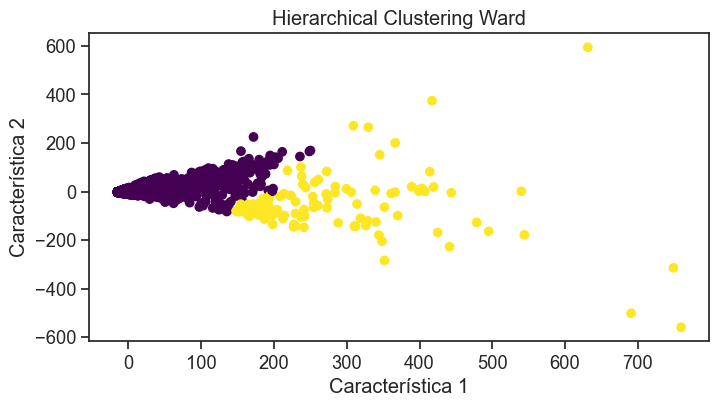

In [69]:
plt.figure(figsize=(8, 4))
plt.scatter(df_thai_pca.iloc[:, 0], df_thai_pca.iloc[:, 1], c=Hclustering_w.labels_, cmap='viridis')
plt.title('Hierarchical Clustering Ward')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.show()


In [70]:
k = 2

Hclustering_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering_c.fit(df_thai_pca)

Hclustering_complete =Hclustering_c.labels_
Hclustering_complete

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
df_thailand['cluster_hcomplete'] = Hclustering_complete
df_thailand['cluster_hcomplete'].value_counts()

0    6996
1       3
Name: cluster_hcomplete, dtype: int64

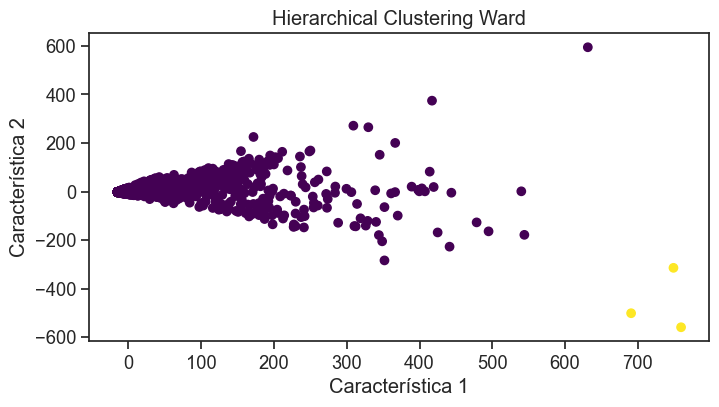

In [72]:
plt.figure(figsize=(8, 4))
plt.scatter(df_thai_pca.iloc[:, 0], df_thai_pca.iloc[:, 1], c=Hclustering_c.labels_, cmap='viridis')
plt.title('Hierarchical Clustering Ward')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.show()

In [73]:
k = 2

Hclustering_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering_a.fit(df_thai_pca)

Hclustering_average =Hclustering_a.labels_
Hclustering_average

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
df_thailand['cluster_haverage'] = Hclustering_average
df_thailand['cluster_haverage'].value_counts()

0    6996
1       3
Name: cluster_haverage, dtype: int64

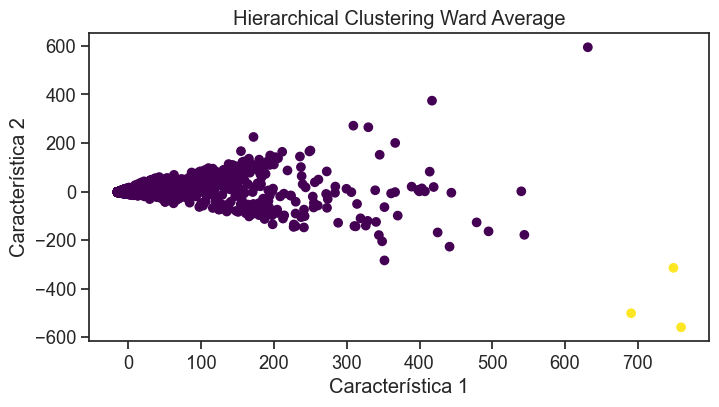

In [75]:
plt.figure(figsize=(8, 4))
plt.scatter(df_thai_pca.iloc[:, 0], df_thai_pca.iloc[:, 1], c=Hclustering_c.labels_, cmap='viridis')
plt.title('Hierarchical Clustering Ward Average')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.show()

## Ejercicio 3

Calcula el rendimiento del clustering mediante un parámetro como puede ser silhouette.

In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [77]:
Kmeans_silhouette = silhouette_score(df_thai_pca, y_predicted)
Hclustering_silhouette = silhouette_score(df_thai_pca, Hclustering_ward)

print("Resultado silhouette Kmeans:", Kmeans_silhouette)
print("Resultado silhouette Hclustering:", Hclustering_silhouette)

Resultado silhouette Kmeans: 0.8764896995424794
Resultado silhouette Hclustering: 0.9178347952815179


**K-Means Silhouette**

For n_clusters = 3 The average silhouette_score is : 0.8764896995424794


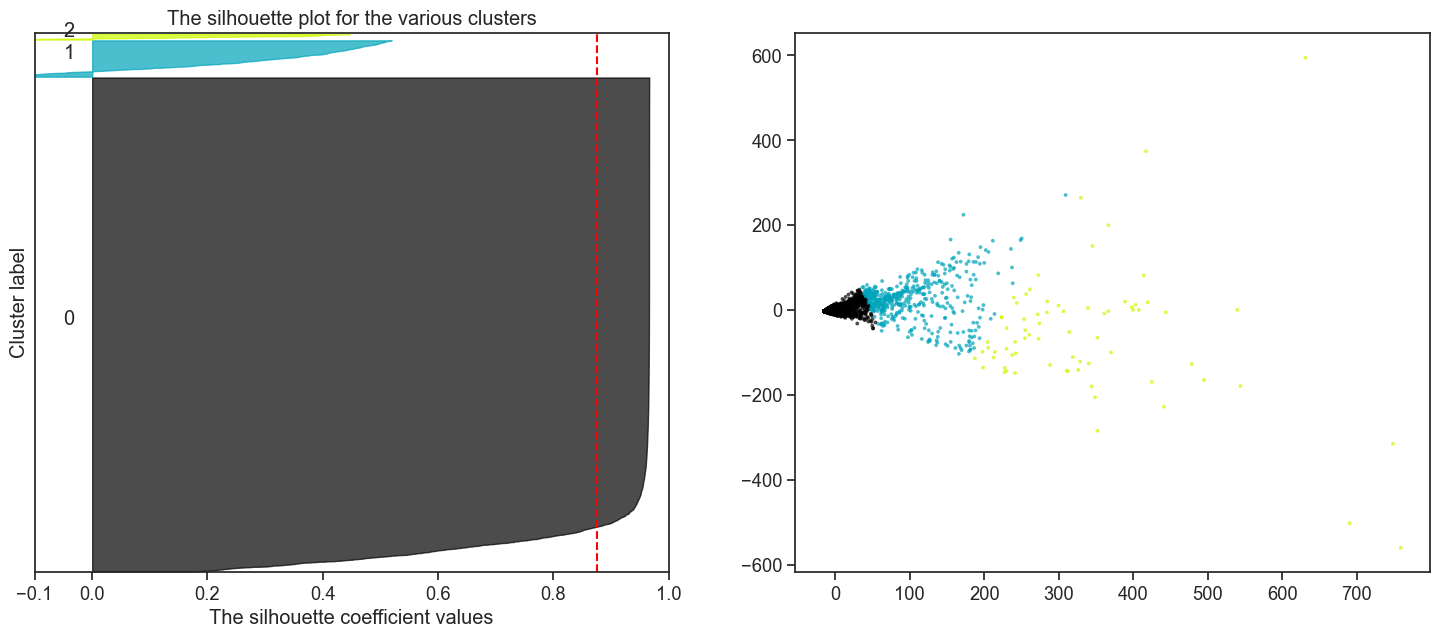

In [78]:
# Asignar los valores de df_thai_pca a X
X = df_thai_pca.values

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Rango de n_clusters (en este caso, solo uno)
range_n_clusters = [km.n_clusters]

for n_clusters in range_n_clusters:
    # Configurar los límites del gráfico de silueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicializar el clusterer con el valor de n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Ordenar los valores de silueta del cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Color del cluster en el gráfico de silueta
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiqueta del cluster en el gráfico de silueta
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Espacio en blanco entre clusters

    # Configuraciones adicionales del gráfico de silueta
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Línea vertical para el valor promedio del coeficiente de silueta
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpiar etiquetas del eje y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gráfico de los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')


**Hierarchical Clustering Silhouette**

For n_clusters = 2 The average silhouette_score is : 0.9178347952815179


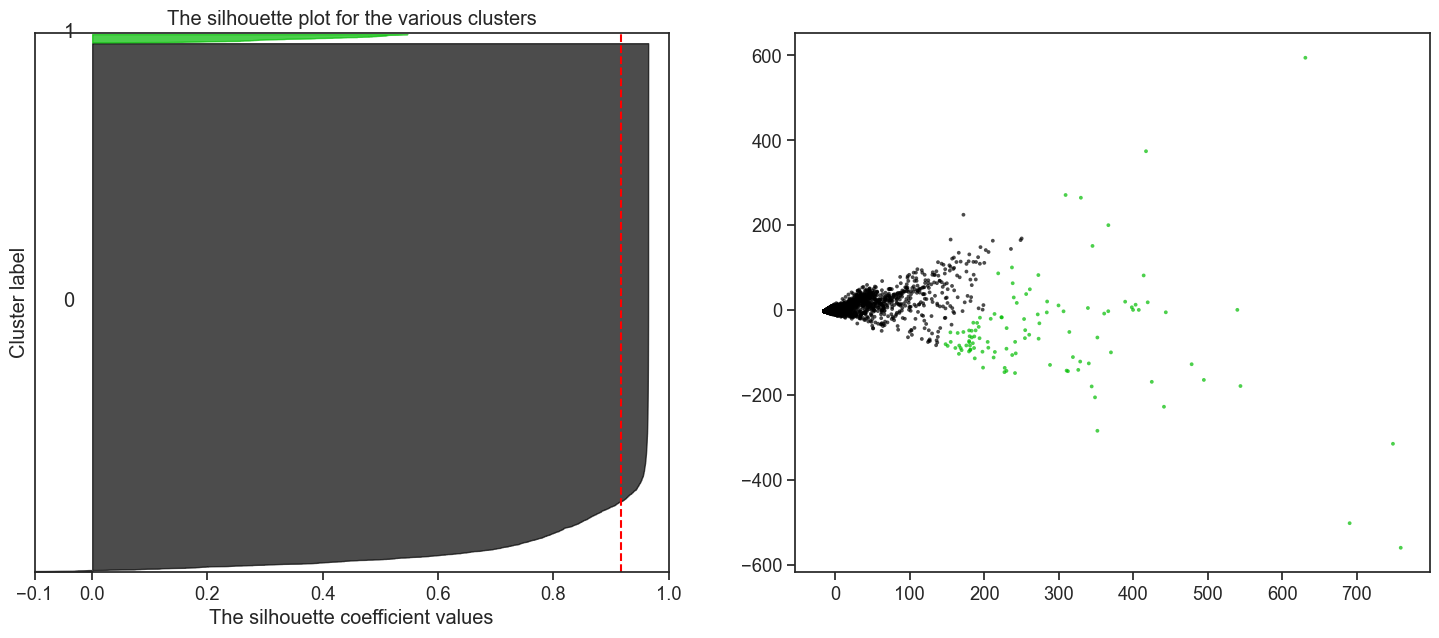

In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Asignar los valores de df_thai_pca a X
X = df_thai_pca.values

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Rango de n_clusters (en este caso, solo uno)
range_n_clusters = [Hclustering_w.n_clusters]

for n_clusters in range_n_clusters:
    # Configurar los límites del gráfico de silueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X, Hclustering_ward)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, Hclustering_ward)

    y_lower = 10
    for i in range(n_clusters):
        # Ordenar los valores de silueta del cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[Hclustering_ward == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Color del cluster en el gráfico de silueta
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiqueta del cluster en el gráfico de silueta
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Espacio en blanco entre clusters

    # Configuraciones adicionales del gráfico de silueta
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Línea vertical para el valor promedio del coeficiente de silueta
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpiar etiquetas del eje y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gráfico de los clusters formados
    colors = cm.nipy_spectral(Hclustering_ward.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

plt.show()